In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

###Dataset - mnist

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000, 10) (10000, 10)


### Basic Cnn 기본모델

In [ ]:
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

def basic_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

model = basic_cnn()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 50)        500       
                                                                 
 activation (Activation)     (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 50)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9800)              0         
                                                                 
 dense (Dense)               (None, 50)                490050    
                                                                 
 dense_1 (Dense)             (None, 10)                510       
                                                        

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
750/750 [==============================] - 7s 5ms/step - loss: 0.9121 - accuracy: 0.7743 - val_loss: 0.3730 - val_accuracy: 0.9401
Epoch 2/10
750/750 [==============================] - 3s 4ms/step - loss: 0.1755 - accuracy: 0.9555 - val_loss: 0.1324 - val_accuracy: 0.9631
Epoch 3/10
750/750 [==============================] - 3s 5ms/step - loss: 0.0867 - accuracy: 0.9746 - val_loss: 0.1001 - val_accuracy: 0.9728
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0615 - accuracy: 0.9817 - val_loss: 0.0998 - val_accuracy: 0.9736
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0989 - val_accuracy: 0.9758
Epoch 6/10
750/750 [==============================] - 3s 4ms/step - loss: 0.0395 - accuracy: 0.9883 - val_loss: 0.1110 - val_accuracy: 0.9734
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0357 - accuracy: 0.9885 - val_loss: 0.1120 - val_accuracy: 0.9749
Epoch 

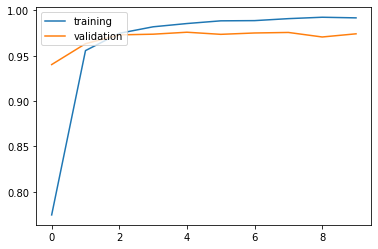

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.1186 - accuracy: 0.9738
Test accuracy:  0.973800003528595


### Deep Cnn -1
6 conv layer, 3 pooling

In [ ]:
def deep_cnn():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    
    model.add(Flatten())
    model.add(Dense(50, activation = 'relu'))
    model.add(Dense(10, activation = 'softmax'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

In [ ]:
model = deep_cnn()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 activation_1 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 activation_2 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 50)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 50)        22550     
                                                      

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
750/750 [==============================] - 8s 10ms/step - loss: 0.2318 - accuracy: 0.9345 - val_loss: 0.0571 - val_accuracy: 0.9822
Epoch 2/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.0494 - val_accuracy: 0.9859
Epoch 3/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0426 - accuracy: 0.9866 - val_loss: 0.0475 - val_accuracy: 0.9847
Epoch 4/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0359 - accuracy: 0.9883 - val_loss: 0.0442 - val_accuracy: 0.9874
Epoch 5/10
750/750 [==============================] - 6s 9ms/step - loss: 0.0300 - accuracy: 0.9908 - val_loss: 0.0413 - val_accuracy: 0.9876
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.0296 - accuracy: 0.9909 - val_loss: 0.0367 - val_accuracy: 0.9892
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.0262 - accuracy: 0.9916 - val_loss: 0.0329 - val_accuracy: 0.9902
Epoch

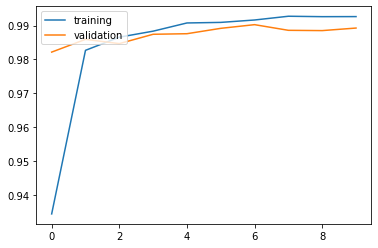

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)
print('Test accuracy: ', results[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0325 - accuracy: 0.9901
Test accuracy:  0.9901000261306763


해야 할 일 ?

1. 층을 늘렸을떄의 acc비교(진행중)  -> resnet과의 차이점?
2. 여러가지 모델 비교(resnet 제외)
3. 배치 정규화, 드랍아웃 써보기


## Deep Cnn -2 
 -가중치 초기화, 배치 정규화, 드랍아웃

kernel_initializer='he_normal'

"He_normal"은 Kaiming He와 동료들이 개발한 가중치 초기화 방법 중 하나입니다. 
이 방법은 ReLU 활성화 함수를 사용하는 네트워크에 특히 효과적입니다. 
이 방법은 평균이 0이고 분산이 (2 / n)인 정규 분포를 사용하여 가중치를 초기화합니다. 
여기서 n은 이전 레이어의 출력 뉴런의 수입니다.

In [ ]:
from keras.layers import BatchNormalization, Dropout
def deep_cnn_advanced():
    model = Sequential()

    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization()) # 배치 정규화
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    model.add(Flatten())
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))  # overfit 방지, 수 조정하기
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))

    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 28, 28, 50)        500       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 50)       200       
 ormalization)                                                   
                                                                 
 activation_7 (Activation)   (None, 28, 28, 50)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 50)        22550     
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 50)       200       
 hNormalization)                                                 
                                                                 
 activation_8 (Activation)   (None, 28, 28, 50)       

In [ ]:
model = deep_cnn_advanced()
model.summary()

In [ ]:
history = model.fit(X_train, y_train, batch_size = 64, validation_split = 0.2, epochs = 10, verbose = 1)

Epoch 1/10
750/750 [==============================] - 9s 10ms/step - loss: 0.4388 - accuracy: 0.8558 - val_loss: 0.0566 - val_accuracy: 0.9826
Epoch 2/10
750/750 [==============================] - 8s 11ms/step - loss: 0.1198 - accuracy: 0.9654 - val_loss: 0.0516 - val_accuracy: 0.9867
Epoch 3/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0913 - accuracy: 0.9747 - val_loss: 0.0588 - val_accuracy: 0.9833
Epoch 4/10
750/750 [==============================] - 7s 10ms/step - loss: 0.0762 - accuracy: 0.9770 - val_loss: 0.0410 - val_accuracy: 0.9903
Epoch 5/10
750/750 [==============================] - 8s 10ms/step - loss: 0.0666 - accuracy: 0.9806 - val_loss: 0.0375 - val_accuracy: 0.9886
Epoch 6/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0550 - accuracy: 0.9844 - val_loss: 0.0390 - val_accuracy: 0.9896
Epoch 7/10
750/750 [==============================] - 8s 11ms/step - loss: 0.0488 - accuracy: 0.9850 - val_loss: 0.0274 - val_accuracy: 0.9923

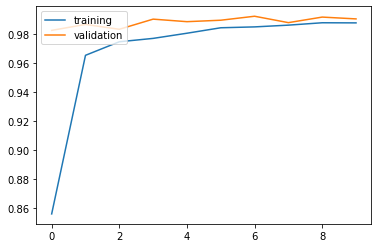

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [ ]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0298 - accuracy: 0.9925


In [ ]:
print('Test accuracy: ', results[1]) 

Test accuracy:  0.9925000071525574
